# 1. Data Collection and Integration

In [1]:
import pandas as pd

# reading data
data = pd.read_csv('winter_data.csv')
print(data.head())


                  Date  Temperature  Snowfall      Activity  Visitors  Rating
0  2023-12-01 00:00:00         -0.0       1.9   Ice Skating       177       5
1  2023-12-01 01:00:00         -6.4       0.5        Skiing        65       3
2  2023-12-01 02:00:00          1.5       0.4   Ice Skating        72       5
3  2023-12-01 03:00:00         10.2       0.5   Ice Skating       112       2
4  2023-12-01 04:00:00         -7.3       4.4  Snowboarding       126       3


In [3]:
# Basic descriptive statistics
print(data.describe())

       Temperature      Snowfall      Visitors       Rating
count  9480.000000  10000.000000  10000.000000  10000.00000
mean     -5.041456      5.133520    104.481000      3.00990
std      10.013490      5.126773     55.206442      1.41979
min     -44.200000      0.000000     10.000000      1.00000
25%     -11.700000      1.500000     56.000000      2.00000
50%      -5.100000      3.600000    105.000000      3.00000
75%       1.700000      7.100000    152.000000      4.00000
max      34.300000     47.500000    199.000000      5.00000


In [4]:
# Check for missing values
print(data.isnull().sum())

Date             0
Temperature    520
Snowfall         0
Activity         0
Visitors         0
Rating           0
dtype: int64


# 2. Exploratory Data Analysis

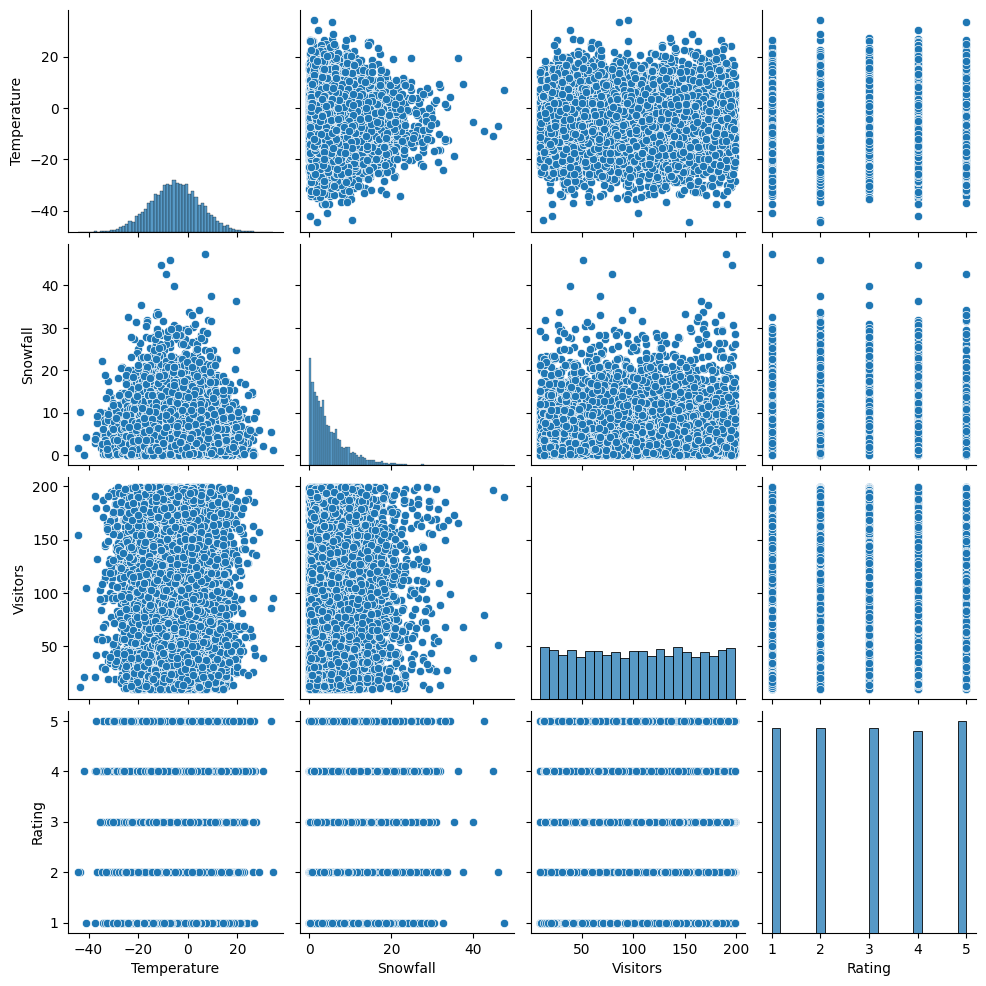

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()


# 3. Data Preprocessing and Cleaning

In [6]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Fill missing values in numeric columns with their mean
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

In [7]:
# cheack missing values
print(data.isnull().sum())

Date           0
Temperature    0
Snowfall       0
Activity       0
Visitors       0
Rating         0
dtype: int64


# 4. Feature Selection and Engineering

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Assuming 'data' is a DataFrame that has been defined previously
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Convert non-numeric columns to numeric, coercing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Optionally, drop rows with NaN values if necessary
X = X.dropna()

# Initialize the selector
selector = SelectKBest(score_func=f_regression, k=5)

try:
    # Fit and transform the data
    X_new = selector.fit_transform(X, y)
    print(X_new)
except ValueError as e:
    print(f"Error during feature selection: {e}")

Error during feature selection: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by SelectKBest.


# 5. Model Selection and Implementation 

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample data creation
# Assuming we have 100 samples and 3 features
X_new = np.random.rand(100, 3)  # Feature matrix with 100 samples and 3 features
y = np.random.rand(100)          # Target variable with 100 samples

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Score:", model.score(X_test, y_test))

Score: 0.04949314549679462
